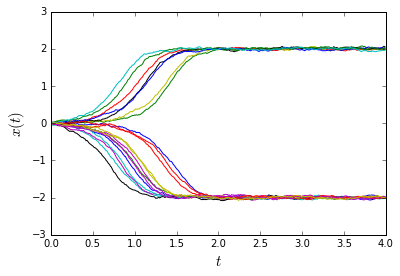

In [8]:
import numpy as np
import math
import itertools
import random 
from matplotlib import pyplot as plt
import scipy
import time

a = 4
D = 0.01
deltat = 0.01
tmax=4
h = 0.001
h_sqrt=np.sqrt(h)
g = np.sqrt(D)
nsteps = np.int(tmax/deltat)
def q(x):
    return a*x-x**3


time2=np.zeros(nsteps)
for i in range(nsteps):
    time2[i]=h*i*10

for i in range(20):
    x=0
    t=0
    traj=np.zeros(nsteps)
    for j in range(nsteps):
        for k in range(10):
            uh=h_sqrt*np.random.normal()
            x = x + h * q(x) + g * uh
            t=t+h
        traj[j]=x
    plt.plot(time2,traj)
   

 
plt.xlim([0,4])
plt.ylabel(r'$x(t)$', fontsize=15)
plt.xlabel(r'$t$', fontsize=15)
plt.show()




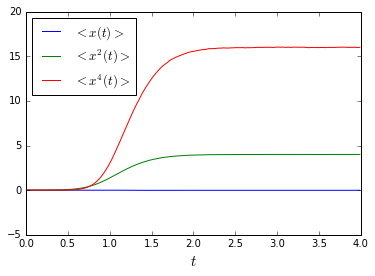

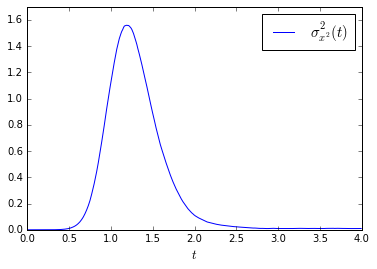

In [22]:
a = 4
D = 0.01
deltat = 0.01
tmax=4
h = 0.001
h_sqrt=np.sqrt(h)
g = np.sqrt(D)
nsteps = np.int(tmax/deltat) 
numtraj=1000


time2=np.zeros(nsteps)
for i in range(nsteps):
    time2[i]=h*i*10

def q(x):
    return a*x-x**3



traj=np.zeros((numtraj,nsteps))

for i in range(numtraj):
    x=0
    t=0
    for j in range(nsteps):
        for k in range(10):
            uh=h_sqrt*np.random.normal()
            x = x + h * q(x) + g * uh
            t=t+h
        traj[i][j]=x
        

        
suma1=np.zeros(nsteps)
suma2=np.zeros(nsteps)  
suma4=np.zeros(nsteps)  

for l in range(nsteps):
    for m in range(numtraj):
        suma1[l]+=traj[m][l]
        suma2[l]+=traj[m][l]**2
        suma4[l]+=traj[m][l]**4

        
plt.plot(time2,suma1/numtraj, label=r'$<x(t)>$')
plt.plot(time2,suma2/numtraj, label=r'$<x^2(t)>$')
plt.plot(time2,suma4/numtraj, label=r'$<x^4(t)>$')
plt.xlabel(r'$t$', fontsize=15)
plt.legend(loc=2, fontsize=13)
plt.show()      

plt.plot(time2,suma4/numtraj-(suma2/numtraj)**2, label=r'$\sigma^2_{x^2}(t)$')
plt.ylim([0,1.7])
plt.legend(fontsize=15)
plt.xlabel(r'$t$', fontsize=13)
plt.show()

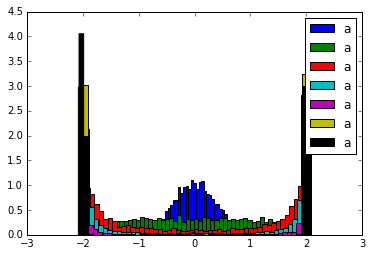

In [53]:
a = 4
D = 0.01
deltat = 0.01
tmax=4
h = 0.001
h_sqrt=np.sqrt(h)
g = np.sqrt(D)
nsteps = np.int(tmax/deltat) 
numtraj=5000


time2=np.zeros(nsteps)
for i in range(nsteps):
    time2[i]=h*i*10

def q(x):
    return a*x-x**3



traj=np.zeros((numtraj,nsteps))

for i in range(numtraj):
    x=0
    t=0
    for j in range(nsteps):
        for k in range(10):
            uh=h_sqrt*np.random.normal()
            x = x + h * q(x) + g * uh
            t=t+h
        traj[i][j]=x
        
times=[0.6,0.9,1.2,1.5,1.8,3,4]

    
timestep=[ 60,  90, 120, 150, 180, 300, 400]

for i in range(np.size(timestep)):
    histog=np.zeros(numtraj)
    temps=timestep[i]
    for j in range(numtraj):
        histog[j]=traj[j][temps-1]
    plt.hist(histog, normed=1, bins=50, label='a')
    
plt.legend()
plt.show()
        
        
        
        
        

        


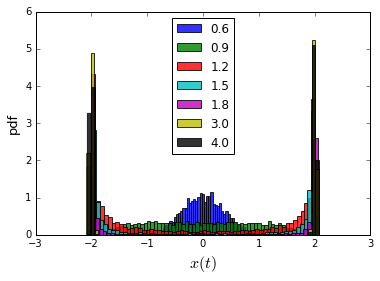

In [88]:

for i in range(np.size(timestep)):
    times2=np.empty(np.size(times))
    for k in range(np.size(times)):
        times2[k]=times[i]
        
    histog=np.zeros(numtraj)
    temps=timestep[i]
    for j in range(numtraj):
        histog[j]=traj[j][temps-1]
    plt.hist(histog, normed=1, bins=60, alpha=0.8, label=times2)

plt.xlabel(r'$x(t)$', fontsize=16)
plt.ylabel('pdf', fontsize=13)
plt.legend(fontsize=12, loc=9)
plt.show()

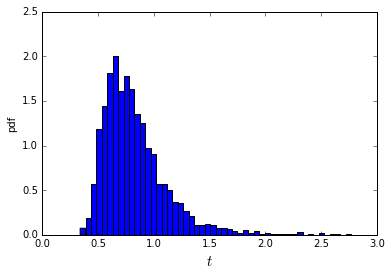

In [108]:
epsilon=0.05
times05=[]
for i in range(numtraj):
    for j in range(nsteps):
        if 0.5-epsilon <np.abs(traj[i][j])<0.5+epsilon:
            times05.append(j*0.01)
            

           
plt.hist(times05, bins=50, normed=1)
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel('pdf')
plt.show()
            
    

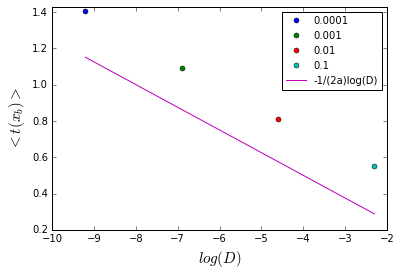

In [15]:
import numpy as np
import math
import itertools
import random 
from matplotlib import pyplot as plt
import scipy
import time


a = 4
D = [0.0001,0.001,0.01,0.1]
deltat = 0.01
tmax=4
h = 0.001
h_sqrt=np.sqrt(h)
g = np.sqrt(D)
nsteps = np.int(tmax/deltat) 
numtraj=500
epsilon=0.01

time2=np.zeros(nsteps)
for i in range(nsteps):
    time2[i]=h*i*10

def q(x):
    return a*x-x**3



for k in range(np.size(D)):
    traj=np.zeros((numtraj,nsteps))
    media=np.zeros(np.size(D))
    for i in range(numtraj):
        x=0
        t=0
        for j in range(nsteps):
            for l in range(10):
                uh=h_sqrt*np.random.normal()
                x = x + h * q(x) + g[k] * uh
                t=t+h
            traj[i][j]=x
        
    times05=[]    
    for i in range(numtraj):
        for j in range(nsteps):
            if 0.5-epsilon <np.abs(traj[i][j])<0.5+epsilon:
                times05.append(j*0.01)
       
    media[k]=np.mean(times05)
    plt.plot(np.log(D[k]), media[k], 'o', markersize=5, label=D[k])
    
  
plt.xlabel(r'$log(D)$', fontsize=15)
plt.ylabel(r'$<t(x_b)>$', fontsize=15)
plt.ylim([0.2,1.43])
plt.plot(np.log(D),-0.125*np.log(D), label='-1/(2a)log(D)')
plt.legend(numpoints=1, fontsize=10)
plt.show()        
        
        
        
       
        
        

In [113]:
D = [0.0001,0.001,0.01,0.1]


print(np.mean(D))

0.027775
